In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [63]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [64]:
import clustering as cs
import transform as tr

# Original MQ probabilities

## Forward 
Probability that LPS occurs next, while MPS occurs

In [65]:
filename = 'mq_forward_probabilities.pickle'
df = pd.read_pickle(filename).fillna(np.nan)

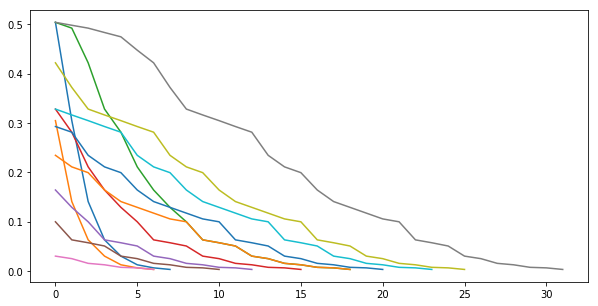

In [66]:
cs.plot_line(df, legend=False)

In [67]:
df.head()

,S0,S1,S6,S9,S12,S35,S39,S14,S20,S22,S25,S27,S52
0,0.503929,0.304710,0.503929,0.328148,0.164085,0.099632,0.030052,0.503929,0.421898,0.328148,0.292740,0.234398,0.503929
1,0.304710,0.140648,0.492210,0.281273,0.128929,0.063011,0.024925,0.498024,0.372070,0.316200,0.281273,0.210960,NaN
2,0.140648,0.063011,0.421898,0.210960,0.099632,0.057152,0.015404,0.492210,0.328148,0.304710,0.234398,0.199242,NaN
3,0.063011,0.030052,0.328148,0.164085,0.063011,0.050560,0.012474,0.483330,0.316200,0.292740,0.210960,0.164085,NaN
4,0.030052,0.012474,0.281273,0.128929,0.057152,0.030052,0.007347,0.474632,0.304710,0.281273,0.199242,0.140648,NaN


In [68]:
clusters = cs.calculate_clusters(df, mode='bi', minimum=1, n_clusters=3)

Clustering method: SpectralBiClustering
Clusters: [[2, 3, 4, 5, 6, 10, 11], [8], [0, 1, 7, 9]] with size 3


- Clustering is based on the correlation of each probability series with each other
- The reason for choosing correlation is that the more similar they are the more likely it is, that they can be merged

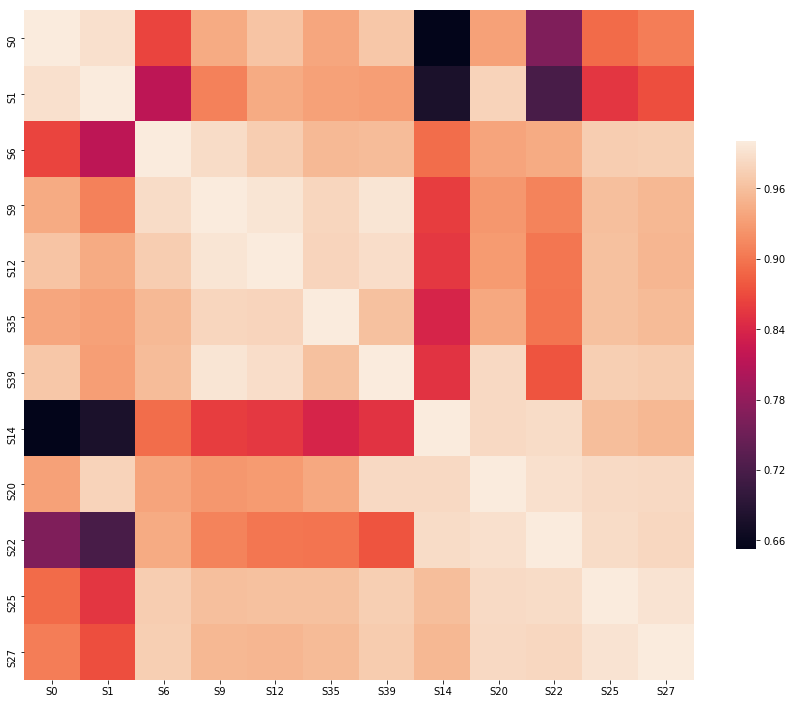

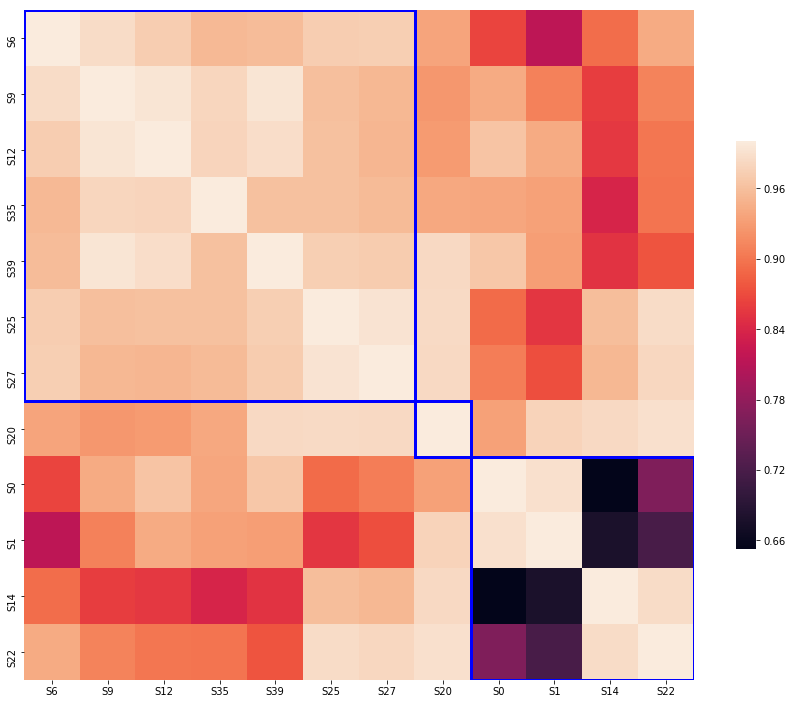

In [69]:
cs.plot_clustered_heatmap(df, clusters)

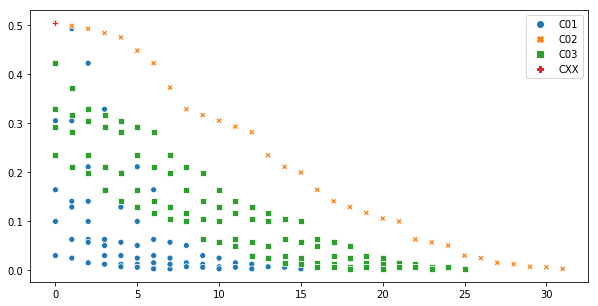

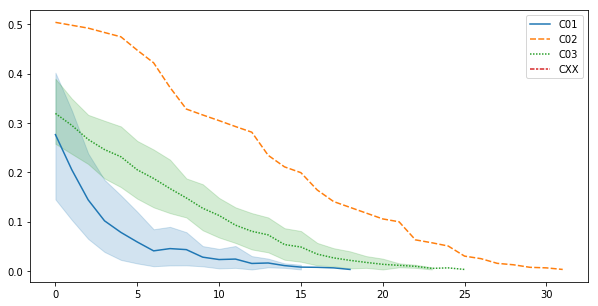

In [70]:
cs.plot_sns(df, clusters)

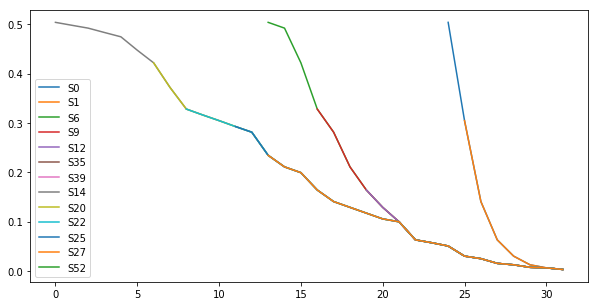

In [11]:
rev = cs.reverse_dataframe(df)
cs.plot_line(rev)

## Backwards 
Probability that MPS occurs next, while LPS occurs

In [71]:
filename = 'mq_backwards_probabilities.pickle'
df = pd.read_pickle(filename).fillna(np.nan)

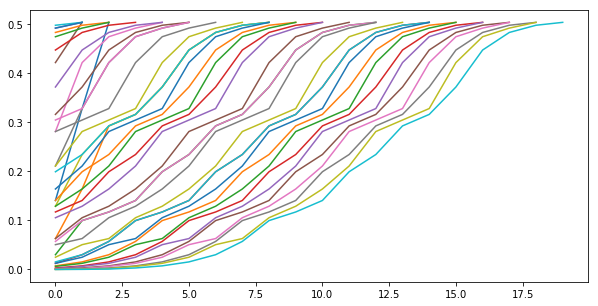

In [72]:
cs.plot_line(df, legend=False)

In [73]:
df.head()

,S2,S3,S4,S5,S7,S8,S10,S11,S13,S15,...,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51
0,0.140648,0.063011,0.030052,0.012474,0.492210,0.421898,0.281273,0.210960,0.128929,0.498024,...,0.012474,0.007347,0.006248,0.003044,0.001671,0.000847,0.000481,0.000206,0.000114,0.000023
1,0.328148,0.164085,0.099632,0.030052,0.503929,0.503929,0.421898,0.328148,0.234398,0.503929,...,0.024925,0.015404,0.012474,0.007347,0.006248,0.003044,0.001671,0.000847,0.000481,0.000206
2,0.503929,0.292740,0.117210,0.057152,NaN,NaN,0.474632,0.421898,0.292740,NaN,...,0.050560,0.030052,0.024925,0.015404,0.012474,0.007347,0.006248,0.003044,0.001671,0.000847
3,NaN,0.316200,0.140648,0.099632,NaN,NaN,0.492210,0.474632,0.316200,NaN,...,0.063011,0.057152,0.050560,0.030052,0.024925,0.015404,0.012474,0.007347,0.006248,0.003044
4,NaN,0.372070,0.199242,0.117210,NaN,NaN,0.503929,0.492210,0.372070,NaN,...,0.105492,0.099632,0.063011,0.057152,0.050560,0.030052,0.024925,0.015404,0.012474,0.007347


In [74]:
clusters = cs.calculate_clusters(df, mode='bi', minimum=1, n_clusters=3)

Clustering method: SpectralBiClustering
Clusters: [[0, 2, 3, 4, 5, 9, 10, 11, 12, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [1, 6, 7, 8, 13, 14, 15, 16]] with size 3


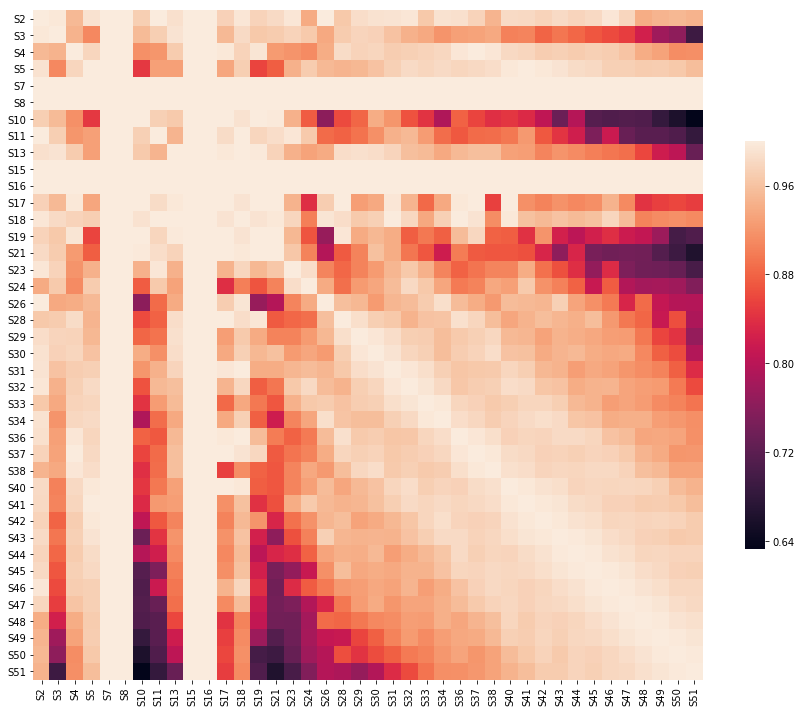

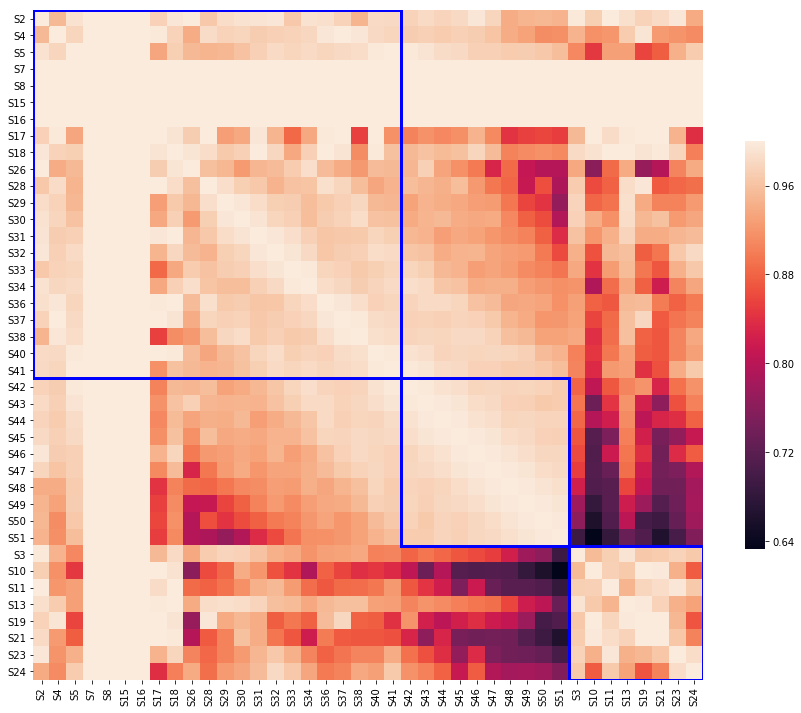

In [75]:
cs.plot_clustered_heatmap(df, clusters)

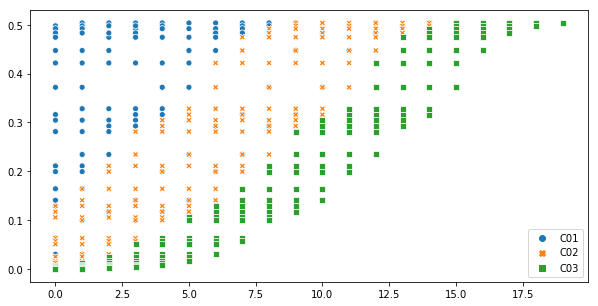

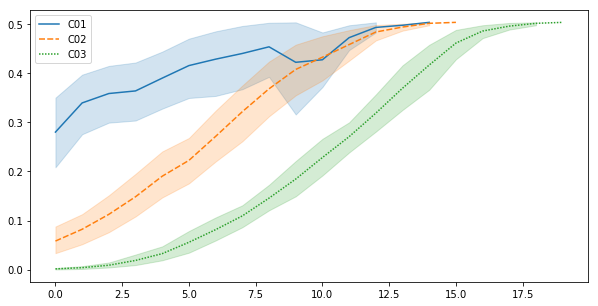

In [76]:
cs.plot_sns(df, clusters)

In [77]:
clusters = cs.calculate_clusters(df, mode='co', minimum=3, n_clusters=3)

Clustering method: SpectralCoClustering
Clusters: [[0, 1, 3, 7, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 29, 31], [6, 8, 11, 12, 13, 14], [2, 25, 26, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39]] with size 3


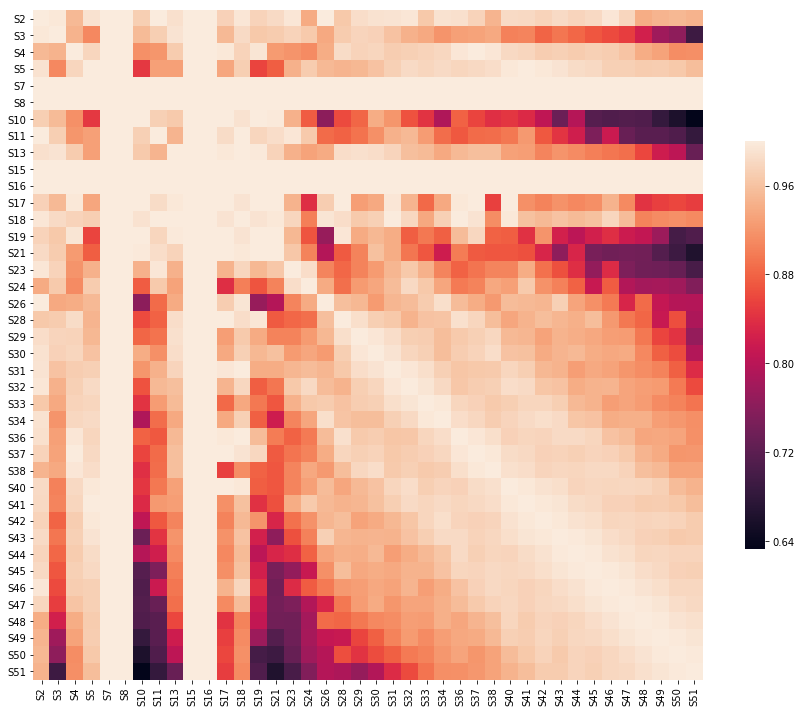

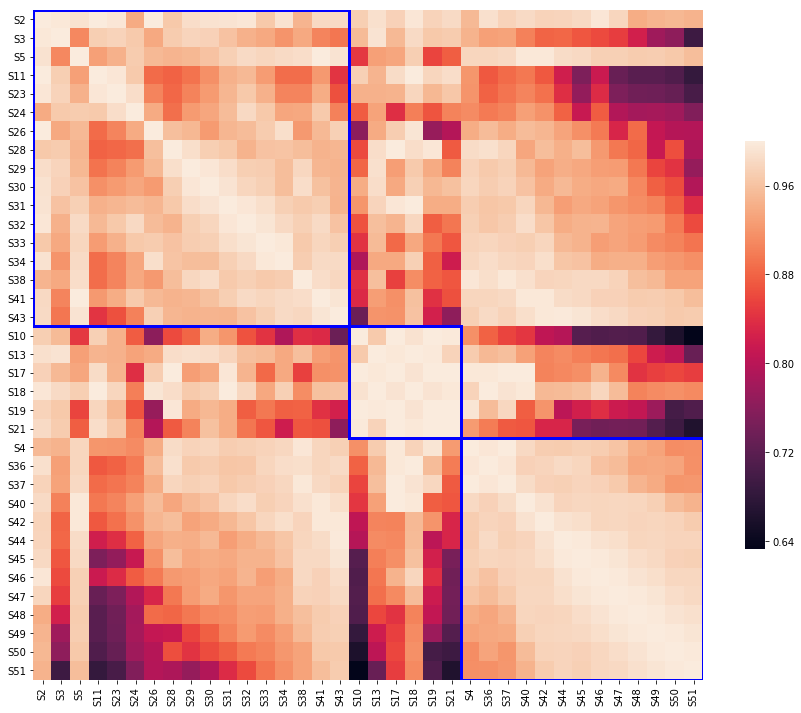

In [78]:
cs.plot_clustered_heatmap(df, clusters)

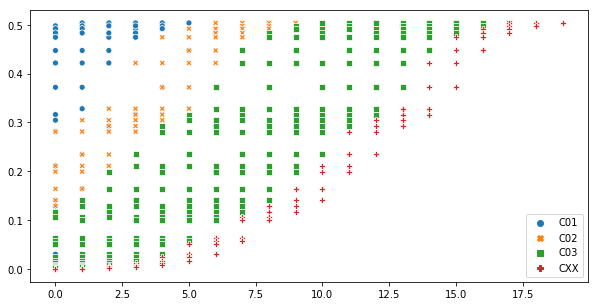

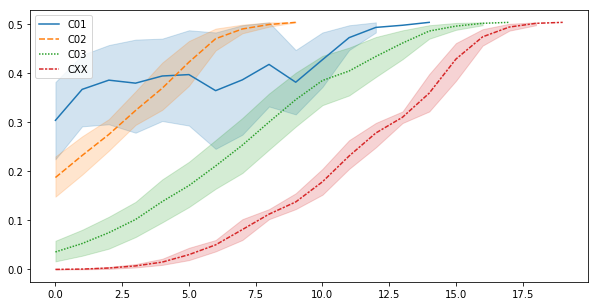

In [79]:
cs.plot_sns(df, clusters)

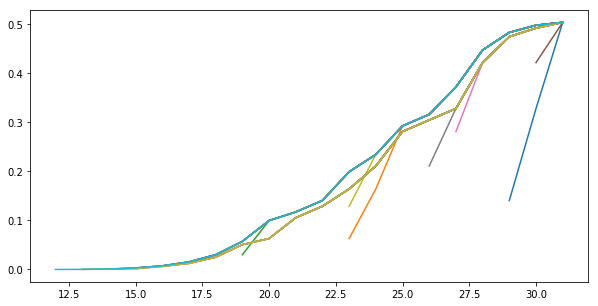

In [80]:
rev = cs.reverse_dataframe(df)
cs.plot_line(rev, legend=False)

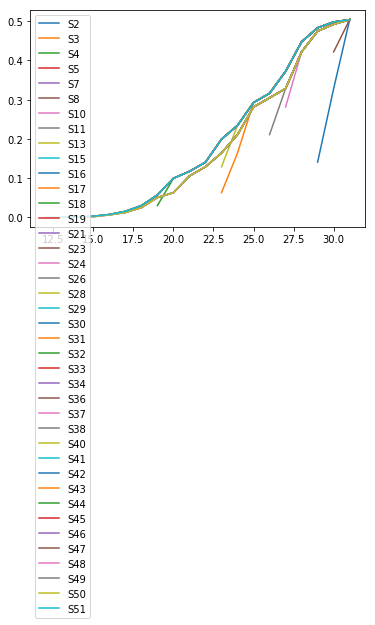

In [82]:
rev.plot()

# Status Quo

In [23]:
from analysis import get_datafile_sizes
from IPython.display import Image

In [24]:
df = get_datafile_sizes()

In [25]:
df.head()

,residual,nlzc,bplanes,residual.mq,nlzc.mq,bplanes.mq,residual.cr,nlzc.cr,bplanes.cr
emac.ml.PV.f32.little.5x90x160x320_0.raw,18432000,11202860,11202860,18022462,11312698,10731830,0.977781,1.009804,0.957954
emac.ml.PV.f32.little.5x90x160x320_1.raw,18432000,11207584,11207584,18023363,11317580,10737006,0.977830,1.009814,0.958013
emac.ml.PV.f32.little.5x90x160x320_2.raw,18432000,11211488,11211488,18022904,11321271,10741025,0.977805,1.009792,0.958037
emac.ml.PV.f32.little.5x90x160x320_3.raw,18432000,11181176,11181176,18020022,11290570,10709910,0.977649,1.009784,0.957852
emac.ml.etadot.f32.little.5x91x160x320_0.raw,18432000,12744948,12744948,18377439,12869919,12297062,0.997040,1.009806,0.964858


In [26]:
file = 'emac.ml.tm1.f32.little.5x90x160x320_3.raw'
df.loc[file,[x for x in df.columns if 'cr' in x]]

residual.cr    0.892953
nlzc.cr        1.009803
bplanes.cr     0.933927
Name: emac.ml.tm1.f32.little.5x90x160x320_3.raw, dtype: float64

# Method

- Analysis of bit patterns of the files

In [38]:
Image("../pics/correlation_window.png")

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

In [39]:
filename = '../emac.ml.tm1.f32.little.5x90x160x320_3.raw.residual.bplanes.32.csv'
df = pd.read_csv(filename, skiprows=1, index_col=0).astype(float)
ones = df.multiply(df.index.size).divide(np.arange(df.index.size)+1, axis=0)

In [40]:
ones.head()

,unit000,unit001,unit002,unit003,unit004,unit005,unit006,unit007,unit008,unit009,...,unit017,unit018,unit019,unit020,unit021,unit022,unit023,unit024,unit025,unit026
ix,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,1.0,1.0,1.000000,0.000000,1.0,1.00,1.000000,0.0,...,1.000000,0.000000,0.0,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
1,1.0,0.0,1.0,1.0,1.000000,0.500000,1.0,1.00,1.000000,0.0,...,0.500000,0.500000,0.0,1.0,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000
2,1.0,0.0,1.0,1.0,0.666667,0.666667,1.0,1.00,0.666667,0.0,...,0.333333,0.666667,0.0,1.0,0.666667,0.333333,0.333333,0.666667,0.666667,0.666667
3,1.0,0.0,1.0,1.0,0.500000,0.750000,1.0,0.75,0.500000,0.0,...,0.250000,0.500000,0.0,1.0,0.750000,0.250000,0.250000,0.500000,0.500000,0.500000
4,1.0,0.2,1.0,0.8,0.400000,0.800000,1.0,0.60,0.400000,0.0,...,0.200000,0.400000,0.0,0.8,0.600000,0.200000,0.400000,0.600000,0.400000,0.400000


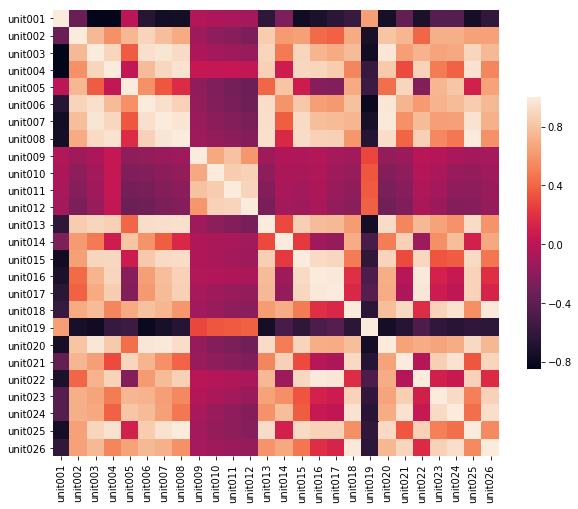

In [41]:
_, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cs.calculate_correlation(ones),cbar_kws={"shrink": 0.5}, square=True, ax=ax);

In [42]:
clusters = cs.calculate_clusters(ones, mode='co', n_clusters=5)

Clustering method: SpectralCoClustering
Clusters: [[19], [3, 4, 6, 7, 8, 13, 15, 16, 17, 20, 22, 25], [9, 10, 11, 12], [1], [2, 5, 14, 18, 21, 23, 24, 26]] with size 5


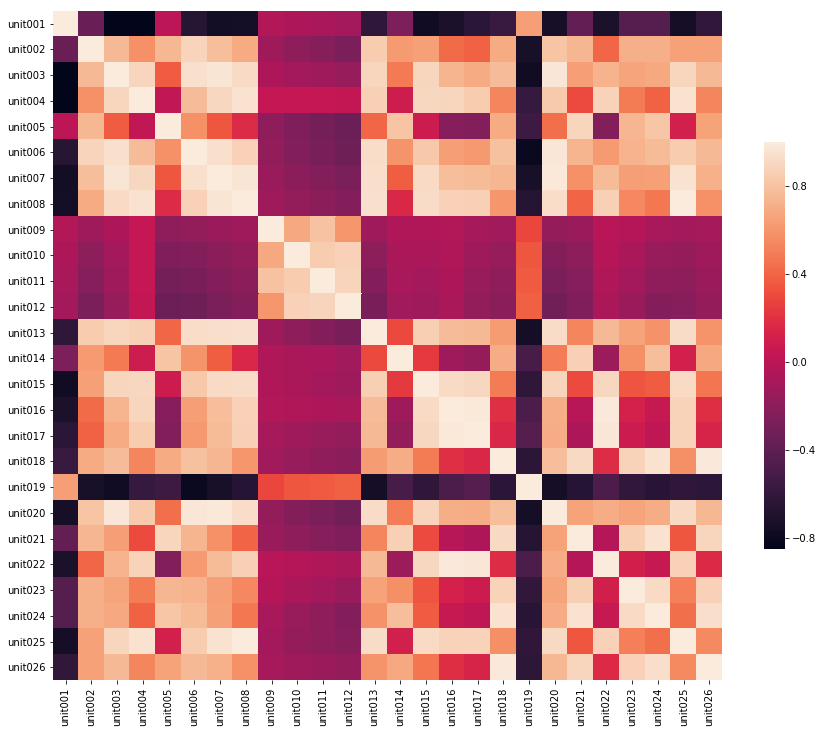

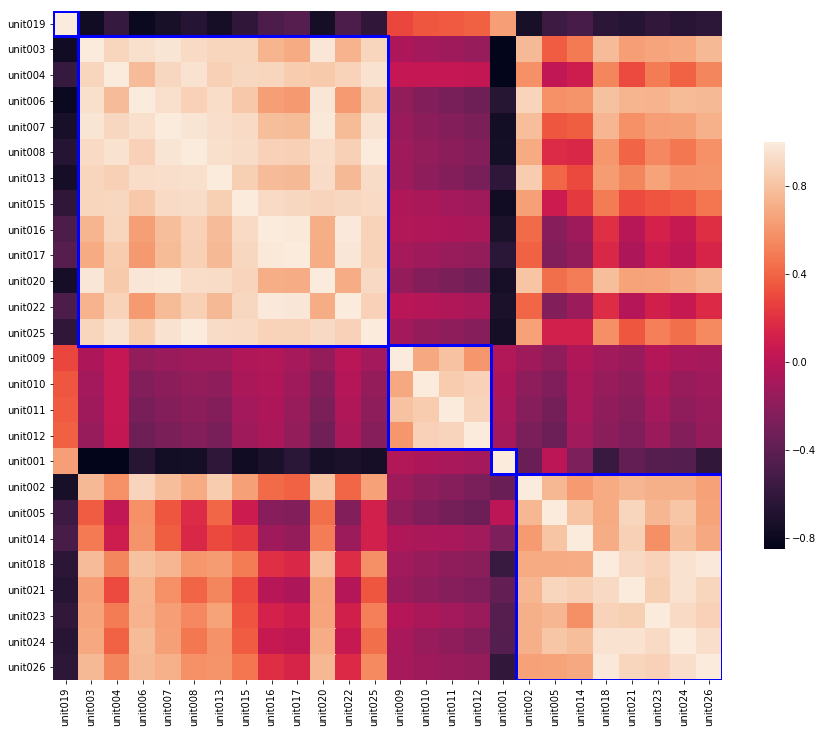

In [43]:
cs.plot_clustered_heatmap(ones, clusters)

**Problem**: These are probability distributions of a symbol being one. This is not necessary the MPS.

## Preprocessing

- Split each probability into four groups:
    - One is **least**  probable bit and probability is **sinking**
    - One is **most** probable bit and probability is  **sinking**
    - One is **least**  probable bit and probability is **rising**
    - One is **most** probable bit and probability is  **rising**

In [165]:
result = tr.final_function(ones)
df = result.sinking
df.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.500000,0.444444,0.500000,0.483871,0.500000,0.304348,0.296296,0.500000,0.160000,0.500000,...,0.150000,0.500000,0.400000,0.115385,0.500000,0.210526,0.500000,0.214286,0.500000,0.153846
1,0.478261,0.400000,0.476190,0.468750,0.444444,0.291667,0.285714,0.400000,0.153846,0.466667,...,0.142857,0.333333,0.333333,0.111111,0.428571,0.200000,0.400000,0.200000,0.400000,0.148148
2,0.458333,0.363636,0.454545,NaN,0.400000,0.280000,0.275862,0.333333,NaN,0.437500,...,0.136364,0.250000,0.285714,0.107143,0.375000,0.190476,0.333333,0.187500,0.333333,0.142857
3,0.440000,0.333333,0.434783,NaN,0.363636,0.269231,NaN,0.285714,NaN,0.411765,...,0.130435,NaN,0.250000,0.103448,0.333333,0.181818,0.285714,0.176471,0.285714,0.137931
4,0.423077,0.307692,0.416667,NaN,0.333333,NaN,NaN,0.250000,NaN,0.388889,...,0.125000,NaN,0.222222,0.100000,0.300000,0.173913,0.250000,0.166667,0.250000,0.133333


In [172]:
min_periods = 5
values_to_drop1  = (df.index.size - df.isnull().sum(axis=0) < min_periods).values
values_to_drop = df.corr(min_periods=min_periods).isnull().all().values
values_to_drop |= values_to_drop1
df.iloc[:, ~values_to_drop].corr(min_periods=min_periods)
# print(correlationmatrix, correlationmatrix.shape, correlationmatrix)
# min_clusters = _clusters(correlationmatrix, mode, **kwargs)
# print(min_clusters)
# clusters = _map_minima_correlation_back_to_original_df(df, min_clusters)
# print("Clustering method: {}".format(CLUSTERING_METHODS[mode]))
# print("Clusters: {} with size {}".format(clusters, len(clusters)))

,0,1,2,4,7,9,10,11,12,13,...,46,47,49,50,51,52,53,54,55,56
0,1.000000,0.996957,0.999986,0.994051,0.974791,0.999186,0.999965,0.974707,0.996877,0.988290,...,0.932519,0.999972,0.983096,0.999975,0.988290,0.999931,0.974791,0.999186,0.974791,0.999953
1,0.996957,1.000000,0.997958,0.999900,0.993063,0.999003,0.996344,0.987699,0.999930,0.998597,...,0.968207,0.997415,0.996745,0.997801,0.998597,0.997660,0.993063,0.999003,0.993063,0.996158
2,0.999986,0.997958,1.000000,0.997062,0.985365,0.999711,0.999929,0.975870,0.998580,0.993751,...,0.956307,1.000000,0.990608,0.999933,0.993751,0.999995,0.985365,0.999711,0.985365,0.999905
4,0.994051,0.999900,0.997062,1.000000,0.990957,0.997040,0.994012,0.989602,0.999349,0.998654,...,0.956310,0.993468,0.996152,0.997003,0.998654,0.993426,0.992525,0.996512,0.990957,0.994822
7,0.974791,0.993063,0.985365,0.990957,1.000000,0.979453,0.976036,0.998776,0.981303,0.995710,...,0.984934,0.971380,0.998634,0.986996,0.996563,0.970346,1.000000,0.970790,1.000000,0.979121
9,0.999186,0.999003,0.999711,0.997040,0.979453,1.000000,0.998968,0.980762,0.999052,0.992156,...,0.937059,0.999295,0.987391,0.999489,0.992156,0.999466,0.981092,1.000000,0.979453,0.999072
10,0.999965,0.996344,0.999929,0.994012,0.976036,0.998968,1.000000,0.973248,0.996693,0.988620,...,0.936391,0.999884,0.983779,0.999999,0.988620,0.999817,0.976036,0.998968,0.976036,0.999998
11,0.974707,0.987699,0.975870,0.989602,0.998776,0.980762,0.973248,1.000000,0.985996,0.994041,...,0.996944,0.975870,0.996487,0.978920,0.994041,0.976522,0.998776,0.980762,0.998776,0.972824
12,0.996877,0.999930,0.998580,0.999349,0.981303,0.999052,0.996693,0.985996,1.000000,0.994407,...,0.937733,0.996718,0.989666,0.998369,0.996138,0.996800,0.988163,0.998487,0.980846,0.997123
13,0.988290,0.998597,0.993751,0.998654,0.995710,0.992156,0.988620,0.994041,0.994407,1.000000,...,0.965994,0.986818,0.999163,0.994135,1.000000,0.986479,0.997120,0.988279,0.995621,0.990159


In [175]:
valid_columns = df.iloc[:, ~values_to_drop].columns.values

array([ 0,  1,  2,  4,  7,  9, 10, 11, 12, 13, 14, 19, 21, 23, 24, 27, 28,
       30, 31, 33, 34, 35, 37, 40, 41, 42, 43, 46, 47, 49, 50, 51, 52, 53,
       54, 55, 56])

In [177]:
corr = df.iloc[:, ~values_to_drop].corr(min_periods=min_periods)

In [184]:
cs.calculate_clusters(df, 'bi', minimum=5, n_clusters=3)[:-1]

[ 0  1  2  4  7  9 10 11 12 13 14 19 21 23 24 27 28 30 31 33 34 35 37 40
 41 42 43 46 47 49 50 51 52 53 54 55 56]


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'